# FINAL PROJECT: STARTUPS RAISED AMOUNT

Columns of our final table:
* cid (pk)
* company total fund raised (response)
* company highest degree (PhD > Master > Bachelor)
* company main_people subject (sum of subject one hot)
* company location (state)
* company num_investors



In [1]:
import numpy as np 
import pandas as pd 
import sklearn 
import os
import random

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from scipy.stats import zscore
from matplotlib import pyplot as plt
from sklearn import ensemble

In [3]:
df = pd.read_csv("data_final.csv")
df = df[df['raised_amount_usd'] > 0]
df.drop(columns=['Unnamed: 0'], inplace=True)
features = df.columns
features = features.drop(['name', 'ipo','funded_object_id','raised_amount_usd'])

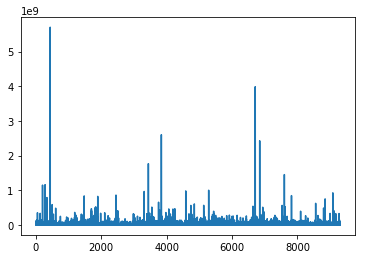

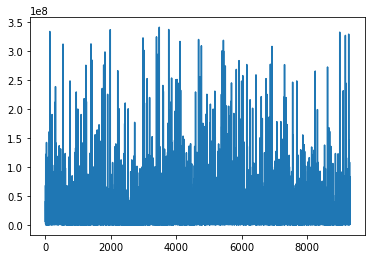

In [4]:
plt.plot(df['raised_amount_usd'])
plt.show()
# np.mean(df['raised_amount_usd'])
# np.median(df['raised_amount_usd'])

# get rid of outliers
df = df[(np.abs(zscore(df['raised_amount_usd'])) < 3)]
plt.plot(df['raised_amount_usd'])
plt.show()

In [5]:
np.sqrt(np.var(df['raised_amount_usd']))

37739531.308767885

In [6]:
features

Index(['num_investors', 'type_Bachelor', 'type_Master', 'type_Other',
       'type_OtherDiploma', 'type_PhD', 'subject_Accounting',
       'subject_Accounting and Finance', 'subject_Advertising',
       'subject_Aerospace Engineering',
       ...
       'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA',
       'state_WI', 'state_WV', 'state_WY', 'state_not specified'],
      dtype='object', length=158)

In [7]:
y = df['raised_amount_usd']
X = df[features]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [9]:
features

Index(['num_investors', 'type_Bachelor', 'type_Master', 'type_Other',
       'type_OtherDiploma', 'type_PhD', 'subject_Accounting',
       'subject_Accounting and Finance', 'subject_Advertising',
       'subject_Aerospace Engineering',
       ...
       'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA',
       'state_WI', 'state_WV', 'state_WY', 'state_not specified'],
      dtype='object', length=158)

In [10]:
X_train

,num_investors,type_Bachelor,type_Master,type_Other,type_OtherDiploma,type_PhD,subject_Accounting,subject_Accounting and Finance,subject_Advertising,subject_Aerospace Engineering,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,state_not specified
5233,15,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3600,12,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5904,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2982,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8830,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1244,21,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2504,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2846,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## linear regression (LASSO)

In [22]:
from sklearn.linear_model import LinearRegression,ElasticNet
import sklearn.metrics as metrics

alpha = []
tr_rmse = []
test_rmse = []

for i in [5000,10000, 5e5, 1e6, 2e6, 3e6, 4e6]:
    lr = ElasticNet(tol= 0.1,alpha= i, l1_ratio = 1.0)
    lr.fit(X_train, y_train)
    alpha.append(i)
    print("alpha: ",i)
    y_pred = lr.predict(X_train)
#     print("The first five prediction {}".format(y_pred[:5]))
#     print("The real first five labels {}".format(y_test[:5]))

    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    tr_rmse.append(rmse)
    print("Train rmse {}".format(rmse))

    y_pred = lr.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    test_rmse.append(rmse)
    print("Test rmse {}".format(rmse))
    print("-"*30)



alpha:  5000
Train rmse 31096174.875758078
Test rmse 36080767.16063726
------------------------------
alpha:  10000
Train rmse 31119479.421716
Test rmse 35988535.482970975
------------------------------
alpha:  500000.0
Train rmse 32202624.02493462
Test rmse 34487656.79743488
------------------------------
alpha:  1000000.0
Train rmse 32442840.965383936
Test rmse 34083970.50269376
------------------------------
alpha:  2000000.0
Train rmse 32764695.040329214
Test rmse 33979272.334147364
------------------------------
alpha:  3000000.0
Train rmse 32937821.21407036
Test rmse 34432467.51960294
------------------------------
alpha:  4000000.0
Train rmse 33134448.721807867
Test rmse 35075451.42364296
------------------------------


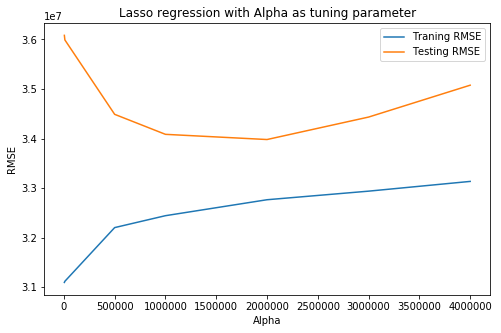

In [31]:
plt.figure(figsize=(8,5))
plt.plot(alpha,tr_rmse, label="Traning RMSE")
plt.plot(alpha,test_rmse, label="Testing RMSE")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("Lasso regression with Alpha as tuning parameter")
plt.legend()
plt.show()

## ncs (num_investor)

In [12]:
#Acknoledgement: https://www.kaggle.com/renanhuanca/regression-splines

In [13]:
df['num_investors']

0        9
1        3
3       19
4        5
5       13
        ..
9302     7
9303     4
9304     6
9305     9
9306    14
Name: num_investors, Length: 8559, dtype: int64

(0.0, 1000000000.0)

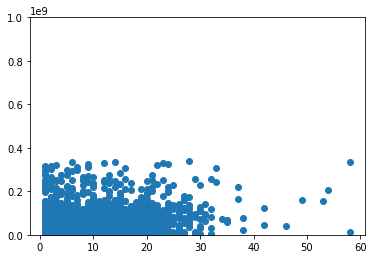

In [14]:
plt.scatter(df['num_investors'],df['raised_amount_usd'])
plt.ylim(0, 1000000000)

In [38]:
df['num_investors'].max()

58

val rmse:  34877290.57761443
test rmse:  34534536.740451224


/Users/xiaoxiangma/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/xiaoxiangma/.local/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


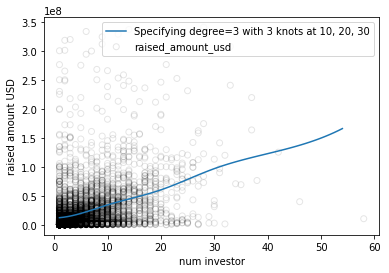

In [34]:
from patsy import dmatrix 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# generating cubic spline with 3 knots at 25, 40 and 60
transformed_x = dmatrix("bs(train, knots=(10,20,30), degree=3, include_intercept=False)"
                        , {"train": X_train['num_investors']}, return_type='dataframe')

# fitting generalized linear model on transformed dataset
fit1 = sm.GLM(y_train, transformed_x).fit()

# # generating cubic spline with 4 knots
# transformed_x2 = dmatrix("bs(train, knots=(25,40,50,65), degree=3, include_intercept=False)", {"train": X_train}, return_type='dataframe')

# # fitting generalized linear model on transformed dataset
# fit2 = sm.GLM(train_y, transformed_x2).fit()

# # predictions on both splines
pred1 = fit1.predict(dmatrix("bs(valid, knots=(10,20,30), include_intercept=False)", {"valid":X_val['num_investors']}
                             , return_type='dataframe'))
pred2 = fit1.predict(dmatrix("bs(valid, knots=(10,20,30), include_intercept=False)", {"valid":X_test['num_investors']}
                             , return_type='dataframe'))
# # calculating rmse
rms1 = np.sqrt(metrics.mean_squared_error(y_val, pred1))
print("val rmse: ",rms1)

rms2 = np.sqrt(metrics.mean_squared_error(y_test, pred2))
print("test rmse: ",rms2)

# # we wil plot the graph for 70 observations only
xp = np.linspace(X_val['num_investors'].min(), X_val['num_investors'].max(), 70)

# # make some predictions
pred1 = fit1.predict(dmatrix("bs(xp, knots=(10,20,30), include_intercept=False)", {"xp":xp}, return_type='dataframe'))
# pred2 = fit2.predict(dmatrix("bs(xp, knots=(25,40,50,60), include_intercept=False)", {"xp":xp}, return_type='dataframe'))

# # plot the splines and error bands
plt.scatter(X_train['num_investors'], y_train, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred1, label='Specifying degree=3 with 3 knots at 10, 20, 30')
# plt.plot(xp, pred2, label='Specifying degree=3 with 4 knots')
plt.legend()
# plt.xlim(15,85)
# plt.ylim(0, 350)
plt.xlabel('num investor')
plt.ylabel('raised amount USD')
plt.show()

In [35]:
print(X_train.shape)
print(y_train.shape)

(5135, 158)
(5135,)


## Random Forest

In [16]:
sc = StandardScaler()

In [17]:
X_val

,num_investors,type_Bachelor,type_Master,type_Other,type_OtherDiploma,type_PhD,subject_Accounting,subject_Accounting and Finance,subject_Advertising,subject_Aerospace Engineering,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,state_not specified
6252,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4133,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1911,8,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2890,5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2456,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5111,8,2.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1210,7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9029,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1122,2,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.ensemble import RandomForestRegressor
for i in [100,200,400,500]:
    regressor = RandomForestRegressor(n_estimators=i, random_state=0,min_samples_split=0.005, max_depth = 6)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_val)
    print('number of trees:', i)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

number of trees: 100
Mean Absolute Error: 18497696.37277397
Mean Squared Error: 1094539892397854.4
Root Mean Squared Error: 33083831.283541728
number of trees: 200
Mean Absolute Error: 18454839.11016851
Mean Squared Error: 1092310184341404.4
Root Mean Squared Error: 33050116.253069434
number of trees: 400
Mean Absolute Error: 18458554.618690446
Mean Squared Error: 1092703276457776.8
Root Mean Squared Error: 33056062.62787171
number of trees: 500
Mean Absolute Error: 18448182.272976168
Mean Squared Error: 1091941319135114.5
Root Mean Squared Error: 33044535.389911514


## GradientBoost Trees

In [20]:
# Acknowledgement: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
mse = metrics.mean_squared_error(y_test, reg.predict(X_test))

In [25]:
mse

1055207579602299.5

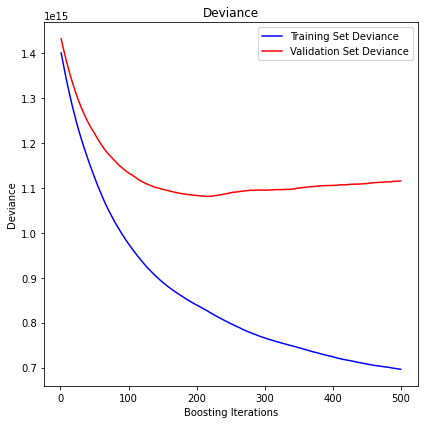

In [29]:
val_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_val)):
    val_score[i] = reg.loss_(y_val, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, val_score, 'r-',
         label='Validation Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()